In [5]:
# Homework 6 Template
# Rianne Kooi

In [6]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass



In [7]:
def OrbitCOM(galaxy, start, end, snap):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
          galaxy: the name of the galaxy, ex: MW
          
          start: the number of the first snapshotto be read in
          
          end: the number of the last snapshot to be read in
          
          n: an integer indicating the intervals over which we 
              will return the COM
    outputs: 
            computes the time and COM position and velocity vectors of a 
            given galaxy in each snapshot and save that output into a file
    """
    
    fileout = "Orbit-"+galaxy+".txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    
    #use center of mass object here 
    delta = 0.1
    volDec = 2.0 #for MW and M31
    if galaxy == "M33":
        volDec = 4 #for M33

    
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start, end)
    if len(snap_ids)==0:
        os.exit()
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    #[number of rows, number of columns]
    
    orbit = np.zeros([len(snap_ids), 7])
        
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids):
        
        # compose the data filename (be careful about the folder)
        #add a string of the filenumber to the value "000"
        ilbl = '000' + str(snap_id)
        #remove all but last 3 digits
        ilbl = ilbl[-3:]
        #create file names
        filename = "%s_"%(galaxy)+'VLowRes/'+"%s_"%(galaxy)+ilbl+'.txt'
        
        
        total, time, data = Read(filename)
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename, 2) 

        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COM_P = COM.COM_P(0.1, volDec)
        COM_V = COM.COM_V(COM_P[0], COM_P[1], COM_P[2])
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        
        orbit[i] = COM.time.value/1000, *tuple(COM_P.value), *tuple(COM_V.value)
        
        # print snap_id to see the progress
        print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [9]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
OrbitCOM('M31', 0, 800, 5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
OrbitCOM('MW', 0, 800, 5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [11]:
OrbitCOM('M33', 0, 800, 5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
MWData = np.genfromtxt('Orbit-MW.txt', dtype=None,names=True,skip_header=0)
M31Data = np.genfromtxt('Orbit-M31.txt', dtype=None,names=True,skip_header=0)
M33Data = np.genfromtxt('Orbit-M33.txt', dtype=None,names=True,skip_header=0)

In [13]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def vDiff(v1, v2):
    """ the function computes the difference between two vectors 
        and returns the magnitude of that vector. 
        input: 
        
        output:
        """
    magnitude = np.sqrt((v1[0]-v2[0])**2 + (v1[1]-v2[2])**2 + (v1[2]-v2[2])**2)
    return magnitude

In [16]:
# Determine the magnitude of the relative position and velocities 
# of MW and M31
M31_time = M31Data['t']
diff_position_M31_MW = vDiff([MWData['x'], MWData['y'], MWData['z']], [M31Data['x'], M31Data['y'], M31Data['z']]) 
diff_velocity_M31_MW = vDiff([MWData['vx'], MWData['vy'], MWData['vz']], [M31Data['vx'], M31Data['vy'], M31Data['vz']])
# of M33 and M31
diff_position_M31_M33 = vDiff([M33Data['x'], M33Data['y'], M33Data['z']], [M31Data['x'], M31Data['y'], M31Data['z']]) 
diff_velocity_M31_M33 = vDiff([M33Data['vx'], M33Data['vy'], M33Data['vz']], [M31Data['vx'], M31Data['vy'], M31Data['vz']])

Text(0, 0.5, 'Separation of Position (in kpc)')

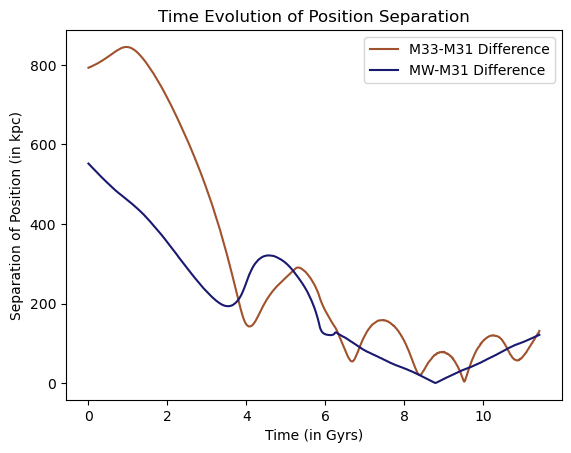

In [17]:
# Plot the Orbit of the galaxies 
#################################
plt.plot(M31_time, diff_position_M31_M33, color = 'sienna', label = "M33-M31 Difference")
plt.plot(M31_time, diff_position_M31_MW, color = 'midnightblue', label = "MW-M31 Difference")
plt.title("Time Evolution of Position Separation")
plt.legend()
plt.xlabel("Time (in Gyrs)")
plt.ylabel("Separation of Position (in kpc)")

Text(0, 0.5, 'Separation of Velocity (in kpc)')

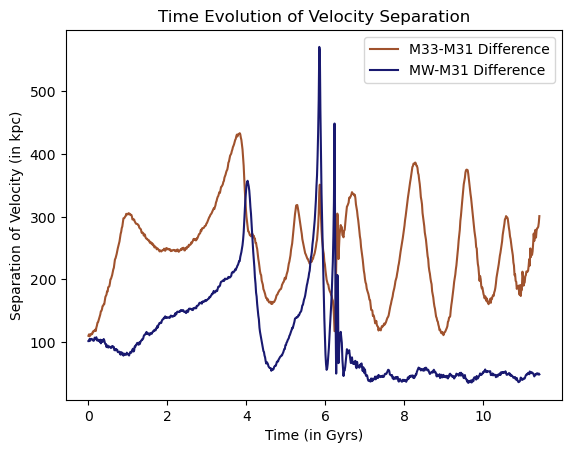

In [18]:
# Plot the orbital velocities of the galaxies 
#################################
plt.plot(M31_time, diff_velocity_M31_M33, color = 'sienna', label = "M33-M31 Difference")
plt.plot(M31_time, diff_velocity_M31_MW, color = 'midnightblue', label = "MW-M31 Difference")
plt.title("Time Evolution of Velocity Separation")
plt.legend()
plt.xlabel("Time (in Gyrs)")
plt.ylabel("Separation of Velocity (in kpc)")

# Questions

### 1. How many close encounters will the MW and M31 experience in the future?
Based on my plots, there will be about 3 times when the Milky Way and M31 are very close together. 


### 2. How is the time evolution of the separation and relative velocity related?
We see that as the separation between the galaxies decrease, the relative velocities increase. 

###  3. When do M31 and the MW merge? (you might need to zoom in on the plot - try a log y axis). What happens to M33’s orbit when they merge?
Around the 6 Gyrs mark, we see a strange 'well' in the plot that could be explained with the  merging of the Milky Way and M31. When M31 and the Milky Way merge, we see a huge decrease in the difference between M33 and M31, which alters M33's orbit.  

### 4. BONUS: what is roughly the decay rate of M33’s orbit after 6 Gyr (ratio of the differ- ence between two successive apocenters and the orbital period; you don’t need to be precise). If this rate is constant, how long will it take M33 to merge with the combined MW+M31 remnant if it is at a distance of 75 kpc?
